<a href="https://colab.research.google.com/github/Parths131/arima-odisha/blob/main/arima_implementation_gsdp_odisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving historical-data-of-odisha.csv to historical-data-of-odisha.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from datetime import timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller

In [ ]:
path = '/content/historical-data-of-odisha.csv'
df = pd.read_csv(path)

In [ ]:
order = (1,2,2)

In [ ]:
df = df[9:17]

In [ ]:
df_excluded = df[['Year', 'GSDP']]

In [ ]:
df_excluded

,Year,GSDP
9,2012,"2,30,987"
10,2013,"2,43,363"
11,2014,"2,65,892"
12,2015,"2,70,665"
13,2016,"2,92,229"
14,2017,"3,37,348"
15,2018,"3,61,117"
16,2019,"3,86,733"


In [ ]:
df_excluded['GSDP'] = df_excluded['GSDP'].str.replace(',', '').astype(int)

<ipython-input-426-2442480505f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_excluded['GSDP'] = df_excluded['GSDP'].str.replace(',', '').astype(int)


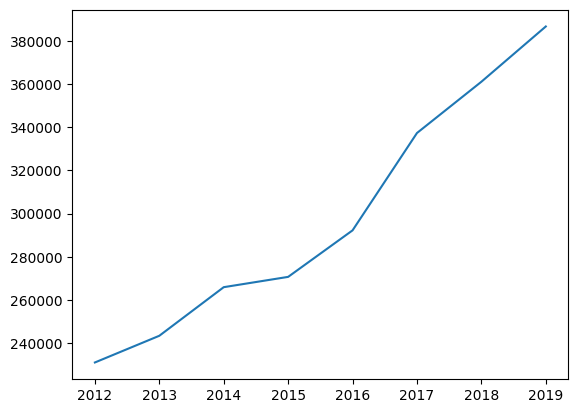

In [ ]:
plt.plot(df_excluded['Year'], df_excluded['GSDP'])

In [ ]:
df_train = df_excluded[:6]
df_test = df_excluded[6:]

In [ ]:
df_train

,Year,GSDP
9,2012,230987
10,2013,243363
11,2014,265892
12,2015,270665
13,2016,292229
14,2017,337348


In [ ]:
testing_range = pd.date_range(start=datetime(2018, 1, 1), end=datetime(2019, 12, 31), freq='YS')

model = ARIMA(df_train['GSDP'], order=order)
model_fit = model.fit()

testing = model_fit.forecast(steps=len(testing_range))

testing_df = pd.DataFrame({'Year': testing_range.year, 'GSDP': testing})

print(testing_df)

    Year           GSDP
15  2018  384737.949454
16  2019  433918.906273


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
rmse = np.sqrt(np.mean((df_test['GSDP'] - testing_df['GSDP']) ** 2))

mae = np.mean(np.abs(df_test['GSDP'] - testing_df['GSDP']))

rmse, mae

(37312.591734830145, 35403.42786358713)

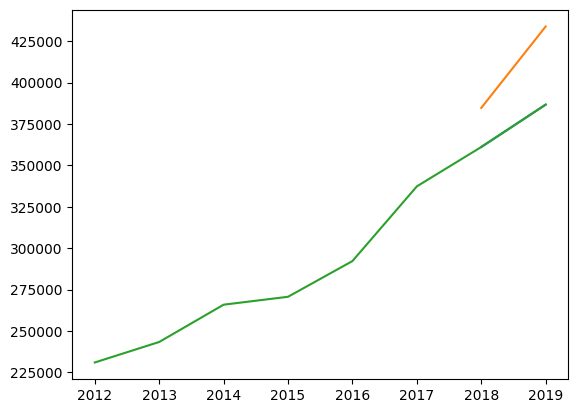

In [ ]:
plt.plot(df_test['Year'], df_test['GSDP'], label='Actual')
plt.plot(testing_df['Year'], testing_df['GSDP'], label='Predicted')
plt.plot(df_excluded['Year'], df_excluded['GSDP'], label='Predicted')

In [ ]:
forecast_range = pd.date_range(start=datetime(2020, 1, 1), end=datetime(2049, 12, 31), freq='YS')

model = ARIMA(df_excluded['GSDP'], order=order)
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(forecast_range))

predictions_df = pd.DataFrame({'Year': forecast_range.year, 'GSDP': predictions})

print(predictions_df)

    Year          GSDP
17  2020  4.103165e+05
18  2021  4.344358e+05
19  2022  4.584347e+05
20  2023  4.824606e+05
21  2024  5.064805e+05
22  2025  5.305017e+05
23  2026  5.545226e+05
24  2027  5.785436e+05
25  2028  6.025646e+05
26  2029  6.265855e+05
27  2030  6.506065e+05
28  2031  6.746275e+05
29  2032  6.986484e+05
30  2033  7.226694e+05
31  2034  7.466904e+05
32  2035  7.707114e+05
33  2036  7.947323e+05
34  2037  8.187533e+05
35  2038  8.427743e+05
36  2039  8.667953e+05
37  2040  8.908162e+05
38  2041  9.148372e+05
39  2042  9.388582e+05
40  2043  9.628791e+05
41  2044  9.869001e+05
42  2045  1.010921e+06
43  2046  1.034942e+06
44  2047  1.058963e+06
45  2048  1.082984e+06
46  2049  1.107005e+06


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


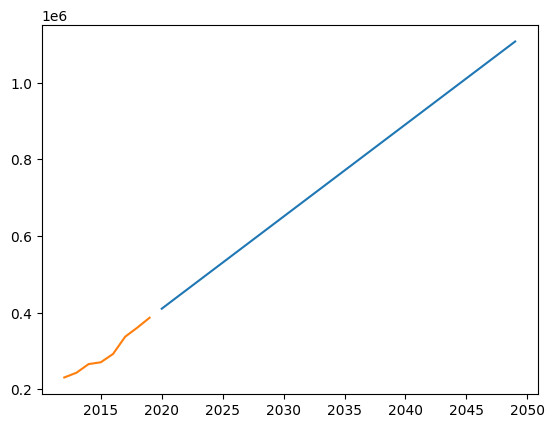

In [ ]:
plt.plot(predictions_df['Year'], predictions_df['GSDP'], label='Predicted')
plt.plot(df_excluded['Year'], df_excluded['GSDP'], label='Predicted')

In [ ]:
testing_seq = df_train.copy()

model = ARIMA(testing_seq['GSDP'], order=order)
model_fit = model.fit()

for testing_year in testing_range:

    pred = model_fit.forecast(steps=1)

    testing_seq = pd.concat([testing_seq, pd.DataFrame({'Year': [testing_year.year], 'GSDP': [pred.iloc[0]]})], ignore_index=True)

    model = ARIMA(testing_seq['GSDP'], order=order)
    model_fit = model.fit()

print(testing_seq)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


   Year           GSDP
0  2012  230987.000000
1  2013  243363.000000
2  2014  265892.000000
3  2015  270665.000000
4  2016  292229.000000
5  2017  337348.000000
6  2018  384737.949454
7  2019  433922.691110


In [ ]:
testing_seq = testing_seq.iloc[6:]

In [ ]:
df_test = df_test.reset_index(drop=True)
testing_seq = testing_seq.reset_index(drop=True)

In [ ]:
rmse = np.sqrt(np.mean((df_test['GSDP'] - testing_seq['GSDP']) ** 2))

mae = np.mean(np.abs(df_test['GSDP'] - testing_seq['GSDP']))

rmse, mae

(37314.98492652715, 35405.32028177346)

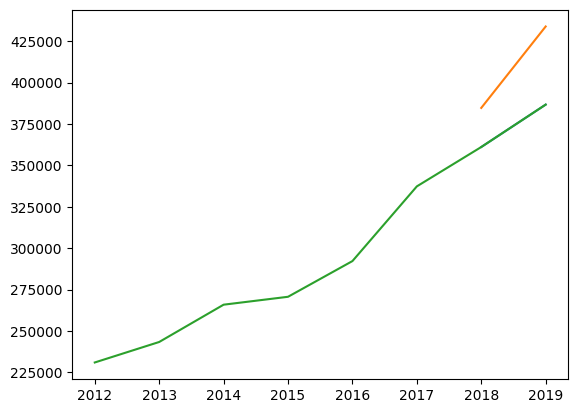

In [ ]:
plt.plot(df_test['Year'], df_test['GSDP'], label='Actual')
plt.plot(testing_seq['Year'], testing_seq['GSDP'], label='Predicted')
plt.plot(df_excluded['Year'], df_excluded['GSDP'], label='Predicted')

In [ ]:
predictions_seq = df_excluded.copy()

forecast_range = pd.date_range(start=datetime(2020, 1, 1), end=datetime(2049, 12, 31), freq='YS')
model = ARIMA(predictions_seq['GSDP'], order=order)
model_fit = model.fit()

for forecast_year in forecast_range:

    pred = model_fit.forecast(steps=1)

    predictions_seq = pd.concat([predictions_seq, pd.DataFrame({'Year': [forecast_year.year], 'GSDP': [pred.iloc[0]]})], ignore_index=True)

    model = ARIMA(predictions_seq['GSDP'], order=order)
    model_fit = model.fit()

print(predictions_seq)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregr

    Year          GSDP
0   2012  2.309870e+05
1   2013  2.433630e+05
2   2014  2.658920e+05
3   2015  2.706650e+05
4   2016  2.922290e+05
5   2017  3.373480e+05
6   2018  3.611170e+05
7   2019  3.867330e+05
8   2020  4.103165e+05
9   2021  4.344346e+05
10  2022  4.584325e+05
11  2023  4.824303e+05
12  2024  5.102127e+05
13  2025  5.466396e+05
14  2026  5.835093e+05
15  2027  6.210433e+05
16  2028  6.573269e+05
17  2029  6.949742e+05
18  2030  7.313470e+05
19  2031  7.686230e+05
20  2032  8.047216e+05
21  2033  8.408972e+05
22  2034  8.760024e+05
23  2035  9.121595e+05
24  2036  9.470683e+05
25  2037  9.831687e+05
26  2038  1.018175e+06
27  2039  1.054134e+06
28  2040  1.089560e+06
29  2041  1.126068e+06
30  2042  1.161927e+06
31  2043  1.197660e+06
32  2044  1.233318e+06
33  2045  1.268974e+06
34  2046  1.304634e+06
35  2047  1.340293e+06
36  2048  1.375952e+06
37  2049  1.411611e+06


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


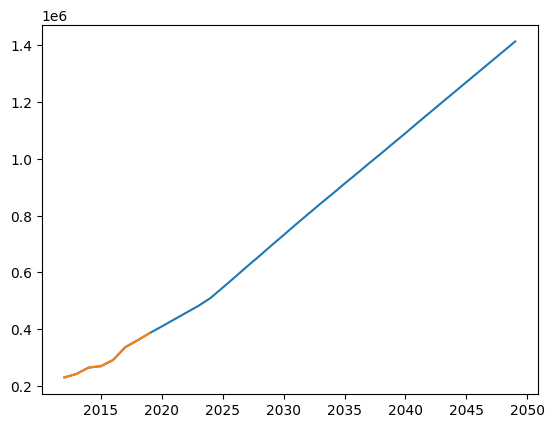

In [ ]:
plt.plot(predictions_seq['Year'], predictions_seq['GSDP'], label='Predicted')
plt.plot(df_excluded['Year'], df_excluded['GSDP'], label='Predicted')